# **Logistic Regression on Telco Churn data**
**Logistic Regression**

While Linear Regression is suited for estimating continuous values, it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, some sort of guidance is required on what would be the most probable class for that data point. For this, Logistic Regression is used.

In simple terms: 
$$ Y = b_0 + b_0X$$
<br>
With Sigmoid function applied---->
$$P = \frac {1}{1 + e^{(-y)}} $$
<br><br>
$$ln(\frac{p}{1-p}) = b_0 + b_0X$$
<br><br>
**Logistic Regression explanation in detail**

**Linear regression** finds a function that relates a continuous dependent variable, **y**, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<br>

**Logistic Regression** is a variation of Linear Regression, useful when the observed dependent variable, **y**, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma(\theta^TX) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma(\theta^TX) = \frac{e^(\theta^TX)}{1+e^(\theta^TX)} 
$$

In this equation, $(\theta^TX)$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](https://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">





The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma(\theta^TX)$, in such a way that the model best predicts the class of each case.


## **Table of Contents**
Telco Churn data
* [Dataset Information](#Dataset)
* [Method Development: Setting up the Logistic Regression Classifier](#Method)
* [Model Evaluation](#Evaluation)



### **import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Dataset Information**<a name="Dataset"></a>
**Aim of the project:** Create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers. 

Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. 

The dataset contains telecommunications data for predicting customer churn. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help to retain customers. all relevant customer data can be analyzed and develop focused customer retention programs.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

###  Load the Telco Churn data 
Use the URL to get the ChurnData.csv. To download the data, use `!wget` to download it from IBM Object Storage.

In [2]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2022-04-19 18:06:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.004s  

2022-04-19 18:06:03 (8.95 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [3]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### **Data pre-processing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
print(df.size)
print(df.shape)
print(df.ndim)

5600
(200, 28)
2


In [6]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
df['churn'] = df['churn'].replace({1.0 : 'Churn = 1', 0.0 : 'Churn = 0'})

In [8]:
# X = df.iloc[:,:-1]  
# X = df.drop('churn',axis=1)
# X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat']]
X = df.loc[:, df.columns != 'churn']
X.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [9]:
y = df['churn']
y.head()

0    Churn = 1
1    Churn = 1
2    Churn = 0
3    Churn = 0
4    Churn = 0
Name: churn, dtype: object

### **Normalize the dataset:**

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855]])

### **Train/Test split**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set- X_train shape:', X_train.shape,  ';  y_train shape:', y_train.shape)
print ('Test set- X_test shape:', X_test.shape, ';  y_train shape:', y_test.shape)

Train set- X_train shape: (160, 27) ;  y_train shape: (160,)
Test set- X_test shape: (40, 27) ;  y_train shape: (40,)


## **Method Development:**<a name="Method"></a>
Build the model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.

__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 

Now fit the model with train set:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [13]:
y_pred = LR.predict(X_test)
y_pred

array(['Churn = 0', 'Churn = 0', 'Churn = 0', 'Churn = 0', 'Churn = 0',
       'Churn = 0', 'Churn = 1', 'Churn = 0', 'Churn = 1', 'Churn = 0',
       'Churn = 1', 'Churn = 0', 'Churn = 0', 'Churn = 1', 'Churn = 0',
       'Churn = 0', 'Churn = 1', 'Churn = 0', 'Churn = 1', 'Churn = 0',
       'Churn = 0', 'Churn = 1', 'Churn = 0', 'Churn = 1', 'Churn = 1',
       'Churn = 0', 'Churn = 1', 'Churn = 1', 'Churn = 0', 'Churn = 0',
       'Churn = 0', 'Churn = 0', 'Churn = 1', 'Churn = 0', 'Churn = 0',
       'Churn = 0', 'Churn = 1', 'Churn = 0', 'Churn = 0', 'Churn = 1'],
      dtype=object)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=1|X), and second column is probability of class 1, P(Y=0|X):

In [14]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.60722328, 0.39277672],
       [0.61809654, 0.38190346],
       [0.58411229, 0.41588771],
       [0.65417657, 0.34582343],
       [0.57846128, 0.42153872]])

## **Model Evaluation - Logistic Regression Classification**<a name="Evaluation"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

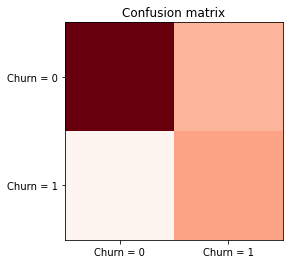

In [15]:
from sklearn.metrics import confusion_matrix
predict_train = LR.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.xticks(np.arange(0, 2), ['Churn = 0', 'Churn = 1'])
plt.yticks(np.arange(0, 2), ['Churn = 0', 'Churn = 1'])
plt.title('Confusion matrix');

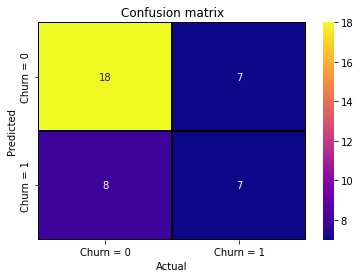

In [16]:
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xticks(np.arange(0.5, 2.5), ['Churn = 0', 'Churn = 1'])
plt.yticks(np.arange(0.5, 2.5), ['Churn = 0', 'Churn = 1']);

**Customers with churn value 0**

The first column is for customers whose actual churn value in test set is 0. As can be calculated, out of 40 customers, the churn value of 26 of them is 0. And out of these 26, the classifier correctly predicted 18 of them as 0, and 7 of them as 1. 

It means, for 18 customers, the actual churn value were 0 in test set, and classifier also correctly predicted those as 0. However, while the actual label of 6 customers were 0, the classifier predicted those as 1, which is not that good. Consider it as error of the model for first column.

**Customers with churn value 1**

The classifier correctly predicted only 7 of them as 1, and 8 of them wrongly as 0. So, it has done a very bad job in predicting the customers with churn value 1. 

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, these numbers can be interpreted as the count of true positives, false positives, true negatives, and false negatives.

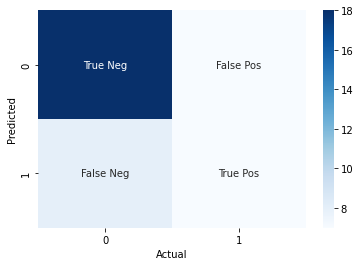

In [17]:
label = ["True Neg", "False Pos", "False Neg", "True Pos"]
label = np.asarray(label).reshape(2,2)
sns.heatmap(cm, annot=label, cmap='Blues', fmt='')
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Logistic Regression Model calculated manually is ', accuracy.round(2))
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model calculated manually is  0.62
Accuracy of Logistic Regression Model is  0.625

 
 Confusion Matrix of Logistic Regression Model:
 [[18  7]
 [ 8  7]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

   Churn = 0       0.69      0.72      0.71        25
   Churn = 1       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40

